
#Project Pipeline

📊 EDA


✨ Data Cleaning


🔧 Data Preprocessing


⚖️ Handling Imbalanced Dataset


🐾 Feature Extraction (N-grams)


📈 Machine Learning


🔁 Deep Learning (RNN, LSTM, GRU)


📊 Model Evaluation

🚀 Predicted System


🌀 Cross Validation


🎯 Hyperparameter Tuning (RandomizedSearchCV)


In [85]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#IMPORTING SOME LIBRARIES

In [86]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import re,json,nltk
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,accuracy_score,precision_score,recall_score,f1_score
from tensorflow.keras.preprocessing.text import Tokenizer
path ='/content/drive/MyDrive/Dataset/Bangla text/train.csv'


#Loading Data

In [87]:

data = pd.read_csv('/content/drive/MyDrive/Dataset/Bangla text/train.csv',encoding='UTF-8')

data.head(10)


,id,text,sentiment
0,0,ব্যাংকের কর্মীরা অত্যন্ত দক্ষ এবং সহযোগী। তাদে...,positive
1,1,আমি কোম্পানির নতুন প্রোডাক্ট সম্পর্কে জানতে চা...,neutral
2,2,কোম্পানির সেবা মানুষের টাকা নষ্ট করার জন্য। আম...,negative
3,3,ব্যাংকের সিস্টেম প্রায়ই ডাউন থাকে। জরুরি সময়...,negative
4,4,ব্যাংকের নোটিফিকেশন সিস্টেম কাজ করে না। আমি আম...,negative
5,5,কোম্পানির প্রোডাক্ট কি অনলাইনে অর্ডার করা যায়...,neutral
6,6,কোম্পানির অফার কি শুধু নতুন গ্রাহকদের জন্য? পু...,neutral
7,7,ব্যাংকের ডকুমেন্টেশন প্রক্রিয়া অত্যন্ত জটিল। ...,negative
8,8,ব্যাংকের সিডি সুবিধা আমাকে অতিরিক্ত আয় করতে স...,positive
9,9,আমি কোম্পানির সার্ভিস নিয়ে খুবই সন্তুষ্ট। তাদ...,positive


#Exploratory data analysis (EDA)

In [88]:
print("Total Reviews:",len(data),
      "\nTotal Positive Reviews:",len(data[data.sentiment =='positive']),
      "\nTotal Negative Reviews:",len(data[data.sentiment =='negative']),
      "\nTotal Neutral Reviews:",len(data[data.sentiment =='neutral']))


Total Reviews: 189 
Total Positive Reviews: 60 
Total Negative Reviews: 65 
Total Neutral Reviews: 64


In [89]:
data.columns

Index(['id', 'text', 'sentiment'], dtype='object')

In [90]:

# print some unprocessed reviews
sample_data = [10,20,30,40,50,60,70,80,90,110,120,130,140,150,170]
for i in sample_data:
      print(data.text[i],'\n====================','Sentiment:-- ',data.sentiment[i],'\n')

ব্যাংকের শাখার পরিবেশ খুব পরিষ্কার এবং আরামদায়ক। কর্মীরা সবসময় হাসিমুখে সেবা দেয়। 
==================== Sentiment:--  positive 

ব্যাংকের এজেন্ট ব্যাংকিং কি? এটা কিভাবে কাজ করে জানতে চাই। 
==================== Sentiment:--  neutral 

কোম্পানির সার্ভিস সেন্টারগুলো কোথায় কোথায়? আমার এলাকার কাছে কোনটি আছে? 
==================== Sentiment:--  neutral 

ব্যাংকের ঋণ প্রক্রিয়া অত্যন্ত জটিল এবং সময়সাপেক্ষ। আমি গত দুই মাস ধরে অপেক্ষা করছি। 
==================== Sentiment:--  negative 

ব্যাংকের ক্রেডিট কার্ড কিভাবে আবেদন করব? অনলাইনে কি করা যাবে? 
==================== Sentiment:--  neutral 

কোম্পানির নতুন সিইও কে হয়েছেন? আমি খবরে দেখেছিলাম পরিবর্তন হয়েছে। 
==================== Sentiment:--  neutral 

কোম্পানির প্রোডাক্ট কি কিস্তিতে কেনা যায়? শর্তগুলো কি? 
==================== Sentiment:--  neutral 

কোম্পানির সার্ভিস চারে পিন নিয়ে আমি খুব হতাশ। তারা আমার সমস্যা সমাধান করতে ব্যর্থ হয়েছে। 
==================== Sentiment:--  negative 

গত মাসে ব্যাংকের নতুন শাখা উদ্বোধন হয়েছে আমাদের 

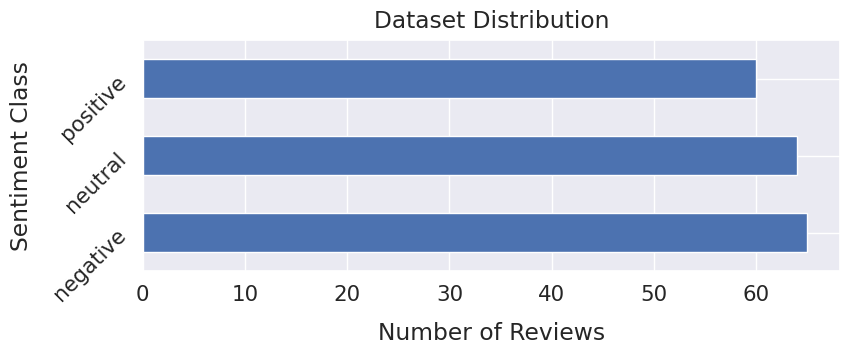

In [91]:
sns.set(font_scale=1.4)
data['sentiment'].value_counts().plot(kind='barh', figsize=(9, 3))
plt.xlabel("Number of Reviews", labelpad=12)
plt.ylabel("Sentiment Class", labelpad=12)
plt.yticks(rotation = 45)
plt.title("Dataset Distribution", y=1.02);

In [92]:
data.head()

,id,text,sentiment
0,0,ব্যাংকের কর্মীরা অত্যন্ত দক্ষ এবং সহযোগী। তাদে...,positive
1,1,আমি কোম্পানির নতুন প্রোডাক্ট সম্পর্কে জানতে চা...,neutral
2,2,কোম্পানির সেবা মানুষের টাকা নষ্ট করার জন্য। আম...,negative
3,3,ব্যাংকের সিস্টেম প্রায়ই ডাউন থাকে। জরুরি সময়...,negative
4,4,ব্যাংকের নোটিফিকেশন সিস্টেম কাজ করে না। আমি আম...,negative


In [93]:
data = data.drop(columns = ['id'])


.

.

#Data Cleaning

In [94]:

# Data cleaning function
def process_comments(Comment):
    Comment = re.sub('[^\u0980-\u09FF]',' ',str(Comment)) #removing unnecessary punctuation
    return Comment

**removing unnecessary punctuation**

In [95]:
# Apply the function into the dataframe
data['cleaned'] = data['text'].apply(process_comments)

# print some cleaned reviews from the dataset
sample_data = [10,20,30,40,50,60,70,80,90,110,120,130,140,150,170]
for i in sample_data:
     print('Original:\n',data.text[i],'\nCleaned:\n',
           data.cleaned[i],'\n','Sentiment: === ',data.sentiment[i],'\n')

Original:
 ব্যাংকের শাখার পরিবেশ খুব পরিষ্কার এবং আরামদায়ক। কর্মীরা সবসময় হাসিমুখে সেবা দেয়। 
Cleaned:
 ব্যাংকের শাখার পরিবেশ খুব পরিষ্কার এবং আরামদায়ক  কর্মীরা সবসময় হাসিমুখে সেবা দেয়  
 Sentiment: ===  positive 

Original:
 ব্যাংকের এজেন্ট ব্যাংকিং কি? এটা কিভাবে কাজ করে জানতে চাই। 
Cleaned:
 ব্যাংকের এজেন্ট ব্যাংকিং কি  এটা কিভাবে কাজ করে জানতে চাই  
 Sentiment: ===  neutral 

Original:
 কোম্পানির সার্ভিস সেন্টারগুলো কোথায় কোথায়? আমার এলাকার কাছে কোনটি আছে? 
Cleaned:
 কোম্পানির সার্ভিস সেন্টারগুলো কোথায় কোথায়  আমার এলাকার কাছে কোনটি আছে  
 Sentiment: ===  neutral 

Original:
 ব্যাংকের ঋণ প্রক্রিয়া অত্যন্ত জটিল এবং সময়সাপেক্ষ। আমি গত দুই মাস ধরে অপেক্ষা করছি। 
Cleaned:
 ব্যাংকের ঋণ প্রক্রিয়া অত্যন্ত জটিল এবং সময়সাপেক্ষ  আমি গত দুই মাস ধরে অপেক্ষা করছি  
 Sentiment: ===  negative 

Original:
 ব্যাংকের ক্রেডিট কার্ড কিভাবে আবেদন করব? অনলাইনে কি করা যাবে? 
Cleaned:
 ব্যাংকের ক্রেডিট কার্ড কিভাবে আবেদন করব  অনলাইনে কি করা যাবে  
 Sentiment: ===  neutral 

Original:
 কোম্পান

In [96]:
data.head()

,text,sentiment,cleaned
0,ব্যাংকের কর্মীরা অত্যন্ত দক্ষ এবং সহযোগী। তাদে...,positive,ব্যাংকের কর্মীরা অত্যন্ত দক্ষ এবং সহযোগী তাদে...
1,আমি কোম্পানির নতুন প্রোডাক্ট সম্পর্কে জানতে চা...,neutral,আমি কোম্পানির নতুন প্রোডাক্ট সম্পর্কে জানতে চা...
2,কোম্পানির সেবা মানুষের টাকা নষ্ট করার জন্য। আম...,negative,কোম্পানির সেবা মানুষের টাকা নষ্ট করার জন্য আম...
3,ব্যাংকের সিস্টেম প্রায়ই ডাউন থাকে। জরুরি সময়...,negative,ব্যাংকের সিস্টেম প্রায়ই ডাউন থাকে জরুরি সময়...
4,ব্যাংকের নোটিফিকেশন সিস্টেম কাজ করে না। আমি আম...,negative,ব্যাংকের নোটিফিকেশন সিস্টেম কাজ করে না আমি আম...


**Remove Low lenght data**

In [97]:
# Length of each Reveiws
data['length'] = data['cleaned'].apply(lambda x:len(x.split()))
# Remove the reviews with least words
dataset = data.loc[data.length>7]
dataset = dataset.reset_index(drop = True)
print("After Cleaning:","\nRemoved {} Small Reviews".format(len(data)-len(dataset)),
      "\nTotal Reviews:",len(dataset))

After Cleaning: 
Removed 4 Small Reviews 
Total Reviews: 185


**Dataset Summary**

In [98]:
dataset.head()

,text,sentiment,cleaned,length
0,ব্যাংকের কর্মীরা অত্যন্ত দক্ষ এবং সহযোগী। তাদে...,positive,ব্যাংকের কর্মীরা অত্যন্ত দক্ষ এবং সহযোগী তাদে...,11
1,আমি কোম্পানির নতুন প্রোডাক্ট সম্পর্কে জানতে চা...,neutral,আমি কোম্পানির নতুন প্রোডাক্ট সম্পর্কে জানতে চা...,11
2,কোম্পানির সেবা মানুষের টাকা নষ্ট করার জন্য। আম...,negative,কোম্পানির সেবা মানুষের টাকা নষ্ট করার জন্য আম...,13
3,ব্যাংকের সিস্টেম প্রায়ই ডাউন থাকে। জরুরি সময়...,negative,ব্যাংকের সিস্টেম প্রায়ই ডাউন থাকে জরুরি সময়...,12
4,ব্যাংকের নোটিফিকেশন সিস্টেম কাজ করে না। আমি আম...,negative,ব্যাংকের নোটিফিকেশন সিস্টেম কাজ করে না আমি আম...,13


In [99]:
dataset = dataset.drop(columns = ['text'])

In [100]:
dataset.head()

,sentiment,cleaned,length
0,positive,ব্যাংকের কর্মীরা অত্যন্ত দক্ষ এবং সহযোগী তাদে...,11
1,neutral,আমি কোম্পানির নতুন প্রোডাক্ট সম্পর্কে জানতে চা...,11
2,negative,কোম্পানির সেবা মানুষের টাকা নষ্ট করার জন্য আম...,13
3,negative,ব্যাংকের সিস্টেম প্রায়ই ডাউন থাকে জরুরি সময়...,12
4,negative,ব্যাংকের নোটিফিকেশন সিস্টেম কাজ করে না আমি আম...,13


In [101]:
def data_summary(dataset):

    """
    This function will print the summary of the reviews and words distribution in the dataset.

    Args:
        dataset: list of cleaned sentences

    Returns:
        Number of documnets per class: int
        Number of words per class: int
        Number of unique words per class: int
    """
    documents = []
    words = []
    u_words = []
    total_u_words = [word.strip().lower() for t in list(dataset.cleaned) for word in t.strip().split()]
    class_label= [k for k,v in dataset.sentiment.value_counts().to_dict().items()]
  # find word list
    for label in class_label:
        word_list = [word.strip().lower() for t in list(dataset[dataset.sentiment==label].cleaned) for word in t.strip().split()]
        counts = dict()
        for word in word_list:
                counts[word] = counts.get(word, 0)+1
        # sort the dictionary of word list
        ordered = sorted(counts.items(), key= lambda item: item[1],reverse = True)
        # Documents per class
        documents.append(len(list(dataset[dataset.sentiment==label].cleaned)))
        # Total Word per class
        words.append(len(word_list))
        # Unique words per class
        u_words.append(len(np.unique(word_list)))

        print("\nClass Name : ",label)
        print("Number of Reviews:{}".format(len(list(dataset[dataset.sentiment==label].cleaned))))
        print("Number of Words:{}".format(len(word_list)))
        print("Number of Unique Words:{}".format(len(np.unique(word_list))))
        print("Most Frequent Words:\n")
        for k,v in ordered[:10]:
              print("{}\t{}".format(k,v))
    print("Total Number of Unique Words:{}".format(len(np.unique(total_u_words))))

    return documents,words,u_words,class_label

#call the fucntion
documents,words,u_words,class_names = data_summary(dataset)


Class Name :  negative
Number of Reviews:65
Number of Words:860
Number of Unique Words:270
Most Frequent Words:

ব্যাংকের	32
কোম্পানির	30
আমি	23
না	19
খুবই	15
আমার	14
অনেক	13
করতে	12
করে	11
ভুল	11

Class Name :  neutral
Number of Reviews:62
Number of Words:621
Number of Unique Words:177
Most Frequent Words:

কি	44
কোম্পানির	37
আমি	24
চাই	24
ব্যাংকের	24
জানতে	16
কোথায়	15
কত	15
কিভাবে	15
প্রোডাক্ট	12

Class Name :  positive
Number of Reviews:58
Number of Words:864
Number of Unique Words:286
Most Frequent Words:

আমি	31
কোম্পানির	29
ব্যাংকের	27
খুব	23
করতে	18
এবং	14
খুবই	14
আমার	14
পারি	13
নতুন	13
Total Number of Unique Words:580


**Dataset Summary Visualization**

[Text(0, 0, 'negative'), Text(1, 0, 'neutral'), Text(2, 0, 'positive')]

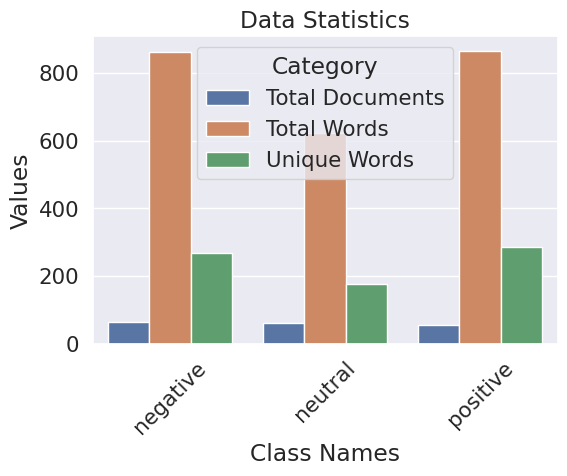

In [102]:
data_matrix = pd.DataFrame({'Total Documents':documents,
                            'Total Words':words,
                            'Unique Words':u_words,
                            'Class Names':class_names})
df = pd.melt(data_matrix, id_vars="Class Names", var_name="Category", value_name="Values")
plt.figure(figsize=(6, 4))
ax = plt.subplot()

sns.barplot(data=df,x='Class Names', y='Values' ,hue='Category')
ax.set_xlabel('Class Names')
ax.set_title('Data Statistics')

ax.xaxis.set_ticklabels(class_names, rotation=45)

**Comment Lenght Distribution**

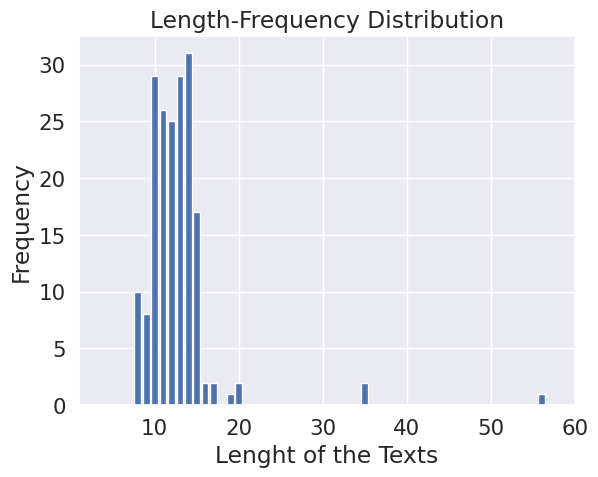

Maximum Length of a review: 56
Minimum Length of a review: 8
Average Length of a reviews: 13.0


In [103]:
# Calculate the Review of each of the Review
frequency = {}
for i in dataset.length:
    frequency[i] = frequency.get(i, 0)+1

plt.bar(frequency.keys(), frequency.values(), color ="b")
plt.xlim(1, 60)
# in this notbook color is not working but it should work.
plt.xlabel('Lenght of the Texts')
plt.ylabel('Frequency')
plt.title('Length-Frequency Distribution')
plt.show()
print(f"Maximum Length of a review: {max(dataset.length)}")
print(f"Minimum Length of a review: {min(dataset.length)}")
print(f"Average Length of a reviews: {round(np.mean(dataset.length),0)}")

#Data preprocessing

In [104]:
import nltk
nltk.download('stopwords')
nltk.download('punkt_tab')
from nltk.tokenize import word_tokenize

import warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


**Tokenization:** The word_tokenize function from the NLTK (Natural Language Toolkit) library is commonly used for tokenizing text into words or word-like units.

**Removing Stopwords:** Stopwords are commonly occurring words that are necessary for the structure of sentences but often don't contribute much to the overall meaning or context of the text and also ** Don't carry significant meaning**

In [105]:

bangla_stopwords = [
    "আমি", "আমরা", "আমাকে", "আমাদের", "আমার", "আপনি", "আপনার", "তুমি", "তোমার", "তোমাদের",
    "সে", "তিনি", "তার", "তাহার", "তাদের", "তাহাদের", "এ", "এই", "ও", "ওই", "সেই",
    "এটা", "এটি", "ওটা", "ওটি", "সেটা", "সেটি", "কিছু", "কেউ", "কিছুই", "কেউই",
    "কি", "কী", "কেন", "কিভাবে", "কখন", "কোথায়", "কোথায়", "কোথা", "কে", "যে",
    "যার", "যাহার", "যাদের", "যাহাদের", "যদি", "যদিও", "যেন", "যত", "যা", "যেমন",
    "তাই", "তথা", "তবে", "তাহলে", "তাহাতে", "তাতে", "এখন", "এখনো", "এখনই", "এখানে",
    "ওখানে", "সেখানে", "যেখানে", "যাবত", "যেতে", "যেন", "হয়", "হয়", "হলে", "হয়নি",
    "হয়েছে", "হয়েছিল", "হয়ে", "হচ্ছে", "নয়", "না", "নাই", "নাকি", "নেওয়া", "নিতে",
    "করতে", "করা", "করার", "করে", "করেছেন", "করেছে", "করেছিলেন", "করেন", "করি", "করবো",
    "করবেন", "করলে", "করতে হবে", "করতেই", "করছিল", "করছেন", "করানোর", "করানো", "করলে",
    "ছিল", "ছিলাম", "ছিলেন", "ছিলেনা", "থাকা", "থাকে", "থাকেন", "থাকবে", "থাকবেন",
    "থাকতে", "থাকায়", "দিতে", "দেওয়া", "দিয়েছেন", "দিয়ে", "দিয়েছে", "দিয়েছিল", "দিয়েছে",
    "দিয়েছিলেন", "দিয়েছিলাম", "দিয়ে থাকে", "যাবে", "যাবেন", "যেতে", "যাচ্ছে", "যাচ্ছি",
    "যায়", "যান", "যাচ্ছেন", "বলেছেন", "বলে", "বলতে", "বললেন", "বলল", "বলবে", "বলবেন",
    "এবং", "অথবা", "তবে", "কারণ", "যদি", "তাতে", "তাহলে", "তাহাতে", "অন্যথায়", "অন্যরা",
    "অনেক", "অন্যদের", "অন্য", "কিছু", "অন্যান্য", "অবশ্য", "সমস্ত", "সব", "সবার", "সবাই",
    "সাধারণত", "সাধারণ", "সর্বত্র", "সর্ব", "সর্বোচ্চ", "প্রতি", "প্রথম", "দ্বিতীয়", "তৃতীয়",
    "অধিকাংশ", "অধিক", "খুব", "বিশেষ", "কম", "অনেক", "অতিরিক্ত", "আর", "বেশি", "অধিকাংশ",
    "অল্প", "কোন", "কোনটি", "কোনটা", "কোনো", "একটি", "এক", "দুই", "তিন", "চার", "পাঁচ",
    "ছয়", "সাত", "আট", "নয়", "দশ", "কয়েকটি", "কয়েক", "প্রতিটি", "সবকিছু", "সবাইকে",
    "এখানকার", "এখান", "ওখান", "সেখানে", "ওখানকার", "কোথাও", "যেখানে", "এখানে", "তাহার",
    "নিজ", "নিজের", "নিজেদের", "নিজে", "নিজেকে", "নতুন", "পুরনো", "আগে", "পর", "পরে",
    "সেখানে", "যেখানে", "ওখানে", "সেটা", "সেটি", "ওটা", "ওটি", "এটা", "এটি", "প্রায়",
    "প্রত্যেক", "প্রতিদিন", "প্রতিবার", "প্রত্যেকটি", "প্রতিটি", "একবার", "দুইবার", "তিনবার",
    "সবসময়", "সারাদিন", "সারারাত", "দিনরাত", "সপ্তাহ", "মাস", "বছর", "আজ", "আগামীকাল",
    "গতকাল", "কাল", "পরশু", "গত", "আগামী", "আগের", "পরবর্তী", "তখন", "এখন", "তখনো", "এখনো"
]


# Function to remove stopwords
def remove_stopwords(text):
  text = word_tokenize(text)
  return [word for word in text if word not in bangla_stopwords]

# Apply stopword removal
dataset['tokens'] = dataset['cleaned'].apply(remove_stopwords)

dataset['processed_text'] = dataset['tokens'].apply(lambda x:' '.join(x))




In [106]:
# After remove stopwords
dataset.head(10)

,sentiment,cleaned,length,tokens,processed_text
0,positive,ব্যাংকের কর্মীরা অত্যন্ত দক্ষ এবং সহযোগী তাদে...,11,"[ব্যাংকের, কর্মীরা, অত্যন্ত, দক্ষ, সহযোগী, পেশ...",ব্যাংকের কর্মীরা অত্যন্ত দক্ষ সহযোগী পেশাদারিত...
1,neutral,আমি কোম্পানির নতুন প্রোডাক্ট সম্পর্কে জানতে চা...,11,"[কোম্পানির, প্রোডাক্ট, সম্পর্কে, জানতে, চাই, প...",কোম্পানির প্রোডাক্ট সম্পর্কে জানতে চাই পাওয়া
2,negative,কোম্পানির সেবা মানুষের টাকা নষ্ট করার জন্য আম...,13,"[কোম্পানির, সেবা, মানুষের, টাকা, নষ্ট, জন্য, এ...",কোম্পানির সেবা মানুষের টাকা নষ্ট জন্য এদের থেক...
3,negative,ব্যাংকের সিস্টেম প্রায়ই ডাউন থাকে জরুরি সময়...,12,"[ব্যাংকের, সিস্টেম, প্রায়ই, ডাউন, জরুরি, সময়...",ব্যাংকের সিস্টেম প্রায়ই ডাউন জরুরি সময়ে অ্যা...
4,negative,ব্যাংকের নোটিফিকেশন সিস্টেম কাজ করে না আমি আম...,13,"[ব্যাংকের, নোটিফিকেশন, সিস্টেম, কাজ, ট্রানজেকশ...",ব্যাংকের নোটিফিকেশন সিস্টেম কাজ ট্রানজেকশনের আ...
5,neutral,কোম্পানির প্রোডাক্ট কি অনলাইনে অর্ডার করা যায়...,10,"[কোম্পানির, প্রোডাক্ট, অনলাইনে, অর্ডার, যায়, ...",কোম্পানির প্রোডাক্ট অনলাইনে অর্ডার যায় ডেলিভা...
6,neutral,কোম্পানির অফার কি শুধু নতুন গ্রাহকদের জন্য পু...,13,"[কোম্পানির, অফার, শুধু, গ্রাহকদের, জন্য, পুরান...",কোম্পানির অফার শুধু গ্রাহকদের জন্য পুরানো গ্রা...
7,negative,ব্যাংকের ডকুমেন্টেশন প্রক্রিয়া অত্যন্ত জটিল ...,12,"[ব্যাংকের, ডকুমেন্টেশন, প্রক্রিয়া, অত্যন্ত, জ...",ব্যাংকের ডকুমেন্টেশন প্রক্রিয়া অত্যন্ত জটিল এ...
8,positive,ব্যাংকের সিডি সুবিধা আমাকে অতিরিক্ত আয় করতে স...,14,"[ব্যাংকের, সিডি, সুবিধা, আয়, সাহায্য, চমৎকার,...",ব্যাংকের সিডি সুবিধা আয় সাহায্য চমৎকার বিনিয়...
9,positive,আমি কোম্পানির সার্ভিস নিয়ে খুবই সন্তুষ্ট তাদ...,14,"[কোম্পানির, সার্ভিস, নিয়ে, খুবই, সন্তুষ্ট, দ্...",কোম্পানির সার্ভিস নিয়ে খুবই সন্তুষ্ট দ্রুত সে...


In [107]:
dataset.drop(columns = ['cleaned','length','tokens'],inplace = True)

In [108]:
dataset.head()

,sentiment,processed_text
0,positive,ব্যাংকের কর্মীরা অত্যন্ত দক্ষ সহযোগী পেশাদারিত...
1,neutral,কোম্পানির প্রোডাক্ট সম্পর্কে জানতে চাই পাওয়া
2,negative,কোম্পানির সেবা মানুষের টাকা নষ্ট জন্য এদের থেক...
3,negative,ব্যাংকের সিস্টেম প্রায়ই ডাউন জরুরি সময়ে অ্যা...
4,negative,ব্যাংকের নোটিফিকেশন সিস্টেম কাজ ট্রানজেকশনের আ...


# Handling Imbalanced Datasets with RandomOverSampler Than final model train  
**RandomOverSampler: Random Over-sampling of Minority Class**

## **RandomOverSampler**

RandomOverSampler is a simple yet effective method for addressing class imbalance by randomly duplicating samples from the minority class.

### **Purpose**
- To balance the dataset by increasing the number of minority class samples through random duplication.

### **Process**
1. **Identification**: The algorithm detects which class(es) are underrepresented.
2. **Random Duplication**: It randomly selects samples from the minority class and duplicates them until the desired class balance is achieved.
3. **Balanced Dataset**: The final dataset contains a more equal distribution between classes.

## **Step-by-Step Process**
1. **Original Dataset Analysis**  
   - Determine the number of samples in the majority and minority classes.

2. **Apply RandomOverSampler**  
   - Duplicate samples from the minority class randomly until the dataset becomes balanced or meets a specified sampling strategy.

3. **Final Dataset**  
   - A balanced dataset is obtained with equal or nearly equal class distribution.

## **Example Workflow**

### **Original Dataset**:
- Minority class: 100 samples  
- Majority class: 1000 samples

### **After RandomOverSampler**:
- Minority class: 100 + 900 duplicated samples = **1000 samples**  
- Final dataset: 1000 (majority) vs 1000 (minority) → **Balanced**

## **Benefits of RandomOverSampler**
- **Simple and Fast**: Easy to implement and computationally efficient.
- **No Data Loss**: Unlike undersampling, it preserves all original data.
- **Improves Model Learning**: More balanced classes lead to better generalization.

## **Limitations**
- **Overfitting Risk**: Duplicating data can cause overfitting, especially on small datasets.
- **No Diversity**: Unlike SMOTE, it doesn't create new samples, which can limit variability in the minority class.

## **When to Use**
- When you need a quick fix to handle imbalance.
- Ideal for baseline models or to compare against more advanced techniques like SMOTE or SMOTETomek.


#Balance Dataset

In [109]:
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(sampling_strategy='auto', random_state=42)

x = data.drop(columns=['sentiment'])
y = data['sentiment']

x_resampled, y_resampled = ros.fit_resample(x, y)

data = pd.concat([x_resampled, y_resampled], axis=1)

In [110]:
data['sentiment'].value_counts()

,count
sentiment,
positive,65
neutral,65
negative,65


#Encode sentiment

In [111]:
# Define manual encoding
sentiment_mapping = {'negative': 1, 'neutral': 0, 'positive': 2}

# Apply encoding
dataset['sentiment'] = dataset['sentiment'].map(sentiment_mapping)


In [112]:
dataset.head()

,sentiment,processed_text
0,2,ব্যাংকের কর্মীরা অত্যন্ত দক্ষ সহযোগী পেশাদারিত...
1,0,কোম্পানির প্রোডাক্ট সম্পর্কে জানতে চাই পাওয়া
2,1,কোম্পানির সেবা মানুষের টাকা নষ্ট জন্য এদের থেক...
3,1,ব্যাংকের সিস্টেম প্রায়ই ডাউন জরুরি সময়ে অ্যা...
4,1,ব্যাংকের নোটিফিকেশন সিস্টেম কাজ ট্রানজেকশনের আ...


 After Cleaning

In [113]:

sentences =dataset['processed_text']

neutral_words = ' '.join(map(str,sentences[dataset['sentiment']==0]))
negative_words = ' '.join(map(str,sentences[dataset['sentiment']==1]))
positive_words = ' '.join(map(str,sentences[dataset['sentiment']==2]))




*Neutral_words ♈*

In [114]:
neutral_words

'কোম্পানির প্রোডাক্ট সম্পর্কে জানতে চাই পাওয়া কোম্পানির প্রোডাক্ট অনলাইনে অর্ডার যায় ডেলিভারি চার্জ কত কোম্পানির অফার শুধু গ্রাহকদের জন্য পুরানো গ্রাহকদের সুবিধা নেই কোম্পানির ওয়ারেন্টি রেজিস্ট্রেশন করব অনলাইনে সম্ভব কোম্পানির নিয়োগ প্রক্রিয়া আবেদন চাই ব্যাংকের ডিমাট অ্যাকাউন্ট খোলার প্রক্রিয়া ডকুমেন্ট লাগবে ব্যাংকের এজেন্ট ব্যাংকিং কাজ জানতে চাই ব্যাংকের অনলাইন পোর্টাল ব্যবহার একাউন্ট খুলেছি ব্যাংকের ঋণের সুদের হার কত হোম লোন চাই কোম্পানির সার্ভিস সেন্টারগুলো এলাকার কাছে আছে ব্যাংকের এফডি স্কিমের বিস্তারিত জানতে চাই কত সময়ের জন্য এফডি যায় কোম্পানির প্রোডাক্ট বিক্রি এলাকায় আছে ব্যাংকের শাখাটি খোলা চাই ব্যাংকের লোন প্রক্রিয়া ডকুমেন্ট লাগবে জানতে চাই কোম্পানির সদর দপ্তর অবস্থিত আবেদন জমা চাই ব্যাংকের ক্রেডিট কার্ড আবেদন করব অনলাইনে কোম্পানির প্রোডাক্টের ওয়ারেন্টি কত দিনের কিনতে কোম্পানির সিইও হয়েছেন খবরে দেখেছিলাম পরিবর্তন কোম্পানির হেল্পলাইন নম্বর তথ্য দরকার ব্যাংকের চেক বই পেতে কত সময় লাগে আবেদন করেছি কোম্পানির পণ্যের দাম কত সবগুলোর একটা তালিকা পেলে ভালো হতো ব্যাংকের এটিএম

In [115]:
import plotly.express as px

neutral =sentences[dataset['sentiment']==0]
neutral_dict =dict(neutral)
temp =pd.DataFrame(columns=['common_word','count'])
temp['common_word'] =list(neutral_dict.keys())
temp['count'] =list(neutral_dict.values())


fig =px.bar(temp,x='count',y='common_word',title=' Most common words in Neutral Sentiment',width=700,height=700,color='common_word')
fig.show()

*Negative_words ♈*

In [116]:
negative_words

'কোম্পানির সেবা মানুষের টাকা নষ্ট জন্য এদের থেকে দূরে চাই ব্যাংকের সিস্টেম প্রায়ই ডাউন জরুরি সময়ে অ্যাকাউন্ট অ্যাক্সেস পারি ব্যাংকের নোটিফিকেশন সিস্টেম কাজ ট্রানজেকশনের আপডেট পাই ব্যাংকের ডকুমেন্টেশন প্রক্রিয়া অত্যন্ত জটিল একটা অ্যাকাউন্ট খুলতে কাগজপত্র লাগে ব্যাংকের ফি স্ট্রাকচার খুবই গ্রাহকদের উপর চাপ তৈরি করছে ব্যাংকের কর্মীরা নিয়ম সম্পর্কে যথেষ্ট জ্ঞান রাখে সময় ভুল তথ্য দেয় কোম্পানির দাম অত্যধিক একই পণ্য কোম্পানি থেকে দামে পাওয়া যায় কোম্পানির সিকিউরিটি সিস্টেম দুর্বল অ্যাকাউন্ট হ্যাক মাসে কোম্পানির পণ্যের মান তুলনায় খারাপ এদের পণ্য কেনা বন্ধ করব এমন একটা ম্যাসেজ ৩০০ টাকা কেটে নিছে কারন গ্রামিন সিম ব্যবহার ে নক দিলে তারা বলতেছে একটা সার্ভিস জানা মতে এমন সার্ভিস এড করিনি কোম্পানির সিস্টেমে ধারাবাহিক সমস্যা প্রতিদিনই বাগ দেখা যায় কোম্পানির বিক্রয় সেবা অত্যন্ত নিম্নমানের পর্যন্ত সমাধান পাইনি ব্যাংকের সুদের হার ব্যাংকের তুলনায় সঞ্চয় স্থানান্তর কথা ভাবছি ব্যাংকের ঋণ প্রক্রিয়া অত্যন্ত জটিল সময়সাপেক্ষ ধরে অপেক্ষা করছি কোম্পানির অ্যাপ বারবার ক্র্যাশ গুরুত্বপূর্ণ লেনদেন গিয়ে 

In [117]:
negative =sentences[dataset['sentiment']==1]
negative_dict =dict(negative)
temp =pd.DataFrame(columns=['common_word','count'])
temp['common_word'] =list(negative_dict.keys())
temp['count'] =list(negative_dict.values())


fig =px.bar(temp,x='count',y='common_word',title=' Most common words in Negative Sentiment',width=700,height=750,color='common_word')
fig.show()

*Positive_words ♈*

In [118]:
positive_words

'ব্যাংকের কর্মীরা অত্যন্ত দক্ষ সহযোগী পেশাদারিত্ব দেখে মুগ্ধ ব্যাংকের সিডি সুবিধা আয় সাহায্য চমৎকার বিনিয়োগ সুযোগ কোম্পানির সার্ভিস নিয়ে খুবই সন্তুষ্ট দ্রুত সেবা সহায়তা মুগ্ধ ব্যাংকের শাখার পরিবেশ পরিষ্কার আরামদায়ক কর্মীরা হাসিমুখে সেবা দেয় কোম্পানি জীবন সহজ দিয়েছে আজকাল সবই ঘরে বসে পারি খুবই আরামদায়ক ব্যাংকের ঋণ সুবিধা অত্যন্ত উপকারী সুদে সহজ শর্তে ঋণ পাওয়া যায় গৃহঋণ নিয়েছি খুবই সন্তুষ্ট ব্যাংকের মিউচুয়াল ফান্ড পরিষেবা ভবিষ্যৎ সুরক্ষিত সাহায্য ভালো রিটার্ন পাচ্ছি ব্যাংকের ক্রেডিট কার্ড রিওয়ার্ড সিস্টেম অসাধারণ নিয়মিত ক্যাশব্যাক পাই সত্যিই উপকারী ব্যাংকের সময়মত খবর পাঠানোর সিস্টেম ভালো অ্যাকাউন্টের আপডেট পাই কোম্পানির অনলাইন সুরক্ষা ব্যবস্থা অত্যন্ত শক্তিশালী সম্পূর্ণ নিরাপদ বোধ লেনদেন কোম্পানির বিশ্বাস দিন দিন বাড়ছে তারা তথ্য সুরক্ষার বিষয়ে যত্নবান কোম্পানির অভিযোগ নিষ্পত্তি প্রক্রিয়া দ্রুত কার্যকর সমস্যা তারা দিনে সমাধান ব্যাংকের এজেন্টরা যত্ন সহকারে সমস্যা শোনেন সমাধান দেন সার্ভিস খুবই ভালো কোম্পানির গ্রাহক সেবা বিভাগ তাড়াতাড়ি সমস্যার সমাধান ধন্যবাদ দক্ষতার জন্য 

In [119]:
positive =sentences[dataset['sentiment']==2]
positive_dict =dict(positive)
temp =pd.DataFrame(columns=['common_word','count'])
temp['common_word'] =list(positive_dict.keys())
temp['count'] =list(positive_dict.values())


fig =px.bar(temp,x='count',y='common_word',title=' Most common words in positive Sentiment',width=700,height=700,color='common_word')
fig.show()

#Separate terget and feature column

In [120]:
x= dataset['processed_text']
y= dataset['sentiment']

using stratify=y ensures that both the training and test sets will have roughly the same proportion of positive, negative and neutral.

In [121]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,stratify=y,random_state=2)


In [122]:
x.shape,x_train.shape,x_test.shape

((185,), (148,), (37,))

In [142]:
x_train

,processed_text
74,কোম্পানির ডেলিভারি সময়মত অপেক্ষা বাধ্য হই
37,কোম্পানির বিক্রয় সেবা অত্যন্ত নিম্নমানের পর্য...
91,ব্যাংকের রিকারিং ডিপোজিট সুবিধা কেমন মাসিক কত ...
156,কোম্পানির ওয়ারেন্টি রেজিস্ট্রেশন করব অনলাইনে ...
2,কোম্পানির সেবা মানুষের টাকা নষ্ট জন্য এদের থেক...
...,...
114,ব্যাংকের অন লাইন পোর্টাল ব্যবহার একাউন্ট খুলেছি
122,কোম্পানির প্রোডাক্ট সম্পর্কে জানতে চাই পাওয়া
151,কোম্পানির বিক্রয় সেবা অত্যন্ত নিম্নমানের পর্য...
161,ব্যাংকের মোবাইল অ্যাপে সমস্যা আছে ব্যবহার খুবই...


In [143]:
y_train

,sentiment
74,1
37,1
91,0
156,0
2,1
...,...
114,0
122,0
151,1
161,1


#Feature Engineering

###Now converting the textual data to numerical data using TfidfVectorizer

ngram_range=(1,1) means you're only considering single words (unigrams) . You can adjust this to include bi-grams (2 consecutive words) or tri-grams (3 consecutive words) by setting ngram_range=(1,2) or ngram_range=(1,3) respectively.

In [123]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [124]:
tfvec1 = TfidfVectorizer(ngram_range=(1,1)) #using TF_IDF unigrams

x_train_vec_tf1 = tfvec1.fit_transform(x_train)
x_test_vec_tf1 = tfvec1.transform(x_test)


In [125]:
tfvec2 = TfidfVectorizer(ngram_range=(1,2)) #using TF_IDF bi-grams

x_train_vec_tf2 = tfvec2.fit_transform(x_train)
x_test_vec_tf2 = tfvec2.transform(x_test)

In [126]:
tfvec3 = TfidfVectorizer(ngram_range=(1,3)) #using TF_IDF tri-grams

x_train_vec_tf3 = tfvec3.fit_transform(x_train)
x_test_vec_tf3 = tfvec3.transform(x_test)

###Now converting the textual data to numerical data using CountVectorizer

In [127]:
from sklearn.feature_extraction.text import CountVectorizer

In [128]:
cvec1 = CountVectorizer(ngram_range=(1,1)) #using countvectorizer unigrams

x_train_vec_cv1 = cvec1.fit_transform(x_train)
x_test_vec_cv1 = cvec1.transform(x_test)

In [129]:
cvec2 = CountVectorizer(ngram_range=(1,2)) #using countvectorizer bi-grams

x_train_vec_cv2 = cvec2.fit_transform(x_train)
x_test_vec_cv2 = cvec2.transform(x_test)

In [130]:
cvec3 = CountVectorizer(ngram_range=(1,3)) #using countvectorizer  tri-grams

x_train_vec_cv3 = cvec3.fit_transform(x_train)
x_test_vec_cv3 = cvec3.transform(x_test)

Unigrams, bigrams, and trigrams are essential tools for building more robust and context-aware models in NLP. They allow the model to move from a simple word-based understanding to a more nuanced interpretation of phrases and contextual word relationships.

#Model Implementation

In [131]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier


In [132]:
svc = SVC(kernel='sigmoid',gamma=1.0,probability=True)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear',penalty='l1')
rfc = RandomForestClassifier(n_estimators=50,random_state=2)
adc = AdaBoostClassifier(n_estimators=50,random_state=2)
bc = BaggingClassifier(n_estimators=50,random_state=2)
etc = ExtraTreesClassifier(n_estimators=50,random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [133]:
classifiers = {

               'SVC' : svc,
               'KN' : knc,
               'NB' : mnb,
               'DTC' : dtc,
               'LR' : lrc,
               'RF' : rfc,
               'AdaBoost' : adc,
               'BGC' : bc,
               'ETC' : etc,
               'GBDT' : gbdt,
               'XGB' : xgb


}

In [134]:
def train_classifier(model,x_train,y_train,x_test,y_test):
    model.fit(x_train,y_train)
    y_pred = model.predict(x_test)
    accuracy = accuracy_score(y_test,y_pred)

    return accuracy



.

.

Accuracy Score using TF_IDF

In [135]:
accuracy_scores_tf1 = []

for model_name, model_instance in classifiers.items():
    accuracy = train_classifier(model_instance, x_train_vec_tf1, y_train, x_test_vec_tf1, y_test)
    print("For", model_name)
    print("Accuracy - ",accuracy)
    accuracy_scores_tf1.append(accuracy)

For SVC
Accuracy -  0.7837837837837838
For KN
Accuracy -  0.6756756756756757
For NB
Accuracy -  0.8648648648648649
For DTC
Accuracy -  0.5675675675675675
For LR
Accuracy -  0.7027027027027027
For RF
Accuracy -  0.8918918918918919
For AdaBoost
Accuracy -  0.6486486486486487
For BGC
Accuracy -  0.8918918918918919
For ETC
Accuracy -  0.8918918918918919
For GBDT
Accuracy -  0.8648648648648649
For XGB
Accuracy -  0.7567567567567568


In [136]:
accuracy_scores_tf2 = []

for model_name, model_instance in classifiers.items():
    accuracy = train_classifier(model_instance, x_train_vec_tf2, y_train, x_test_vec_tf2, y_test)
    print("For", model_name)
    print("Accuracy - ",accuracy)
    accuracy_scores_tf2.append(accuracy)

For SVC
Accuracy -  0.8108108108108109
For KN
Accuracy -  0.6756756756756757
For NB
Accuracy -  0.8378378378378378
For DTC
Accuracy -  0.5675675675675675
For LR
Accuracy -  0.6486486486486487
For RF
Accuracy -  0.8378378378378378
For AdaBoost
Accuracy -  0.6756756756756757
For BGC
Accuracy -  0.8648648648648649
For ETC
Accuracy -  0.8918918918918919
For GBDT
Accuracy -  0.8648648648648649
For XGB
Accuracy -  0.7837837837837838


In [137]:
accuracy_scores_tf3 = []

for model_name, model_instance in classifiers.items():
    accuracy = train_classifier(model_instance, x_train_vec_tf3, y_train, x_test_vec_tf3, y_test)
    print("For", model_name)
    print("Accuracy - ",accuracy)
    accuracy_scores_tf3.append(accuracy)

For SVC
Accuracy -  0.8378378378378378
For KN
Accuracy -  0.6756756756756757
For NB
Accuracy -  0.8378378378378378
For DTC
Accuracy -  0.5675675675675675
For LR
Accuracy -  0.5945945945945946
For RF
Accuracy -  0.8378378378378378
For AdaBoost
Accuracy -  0.7027027027027027
For BGC
Accuracy -  0.8648648648648649
For ETC
Accuracy -  0.8918918918918919
For GBDT
Accuracy -  0.8648648648648649
For XGB
Accuracy -  0.7567567567567568


.

.

Accuracy Score using Count_Vectorizer

In [138]:
accuracy_scores_cv1 = []

for model_name, model_instance in classifiers.items():
    accuracy = train_classifier(model_instance, x_train_vec_cv1, y_train, x_test_vec_cv1, y_test)
    print("For", model_name)
    print("Accuracy - ",accuracy)
    accuracy_scores_cv1.append(accuracy)

For SVC
Accuracy -  0.43243243243243246
For KN
Accuracy -  0.7027027027027027
For NB
Accuracy -  0.8378378378378378
For DTC
Accuracy -  0.5405405405405406
For LR
Accuracy -  0.8108108108108109
For RF
Accuracy -  0.8918918918918919
For AdaBoost
Accuracy -  0.6756756756756757
For BGC
Accuracy -  0.8648648648648649
For ETC
Accuracy -  0.8918918918918919
For GBDT
Accuracy -  0.8918918918918919
For XGB
Accuracy -  0.7567567567567568


In [139]:
accuracy_scores_cv2 = []

for model_name, model_instance in classifiers.items():
    accuracy = train_classifier(model_instance, x_train_vec_cv2, y_train, x_test_vec_cv2, y_test)
    print("For", model_name)
    print("Accuracy - ",accuracy)
    accuracy_scores_cv2.append(accuracy)

For SVC
Accuracy -  0.4594594594594595
For KN
Accuracy -  0.7027027027027027
For NB
Accuracy -  0.8108108108108109
For DTC
Accuracy -  0.5405405405405406
For LR
Accuracy -  0.7837837837837838
For RF
Accuracy -  0.918918918918919
For AdaBoost
Accuracy -  0.7027027027027027
For BGC
Accuracy -  0.8648648648648649
For ETC
Accuracy -  0.8918918918918919
For GBDT
Accuracy -  0.8648648648648649
For XGB
Accuracy -  0.8108108108108109


In [140]:
accuracy_scores_cv3 = []

for model_name, model_instance in classifiers.items():
    accuracy = train_classifier(model_instance, x_train_vec_cv3, y_train, x_test_vec_cv3, y_test)
    print("For", model_name)
    print("Accuracy - ",accuracy)
    accuracy_scores_cv3.append(accuracy)

For SVC
Accuracy -  0.4594594594594595
For KN
Accuracy -  0.6216216216216216
For NB
Accuracy -  0.8108108108108109
For DTC
Accuracy -  0.5405405405405406
For LR
Accuracy -  0.7837837837837838
For RF
Accuracy -  0.918918918918919
For AdaBoost
Accuracy -  0.7027027027027027
For BGC
Accuracy -  0.8648648648648649
For ETC
Accuracy -  0.8918918918918919
For GBDT
Accuracy -  0.8648648648648649
For XGB
Accuracy -  0.8108108108108109


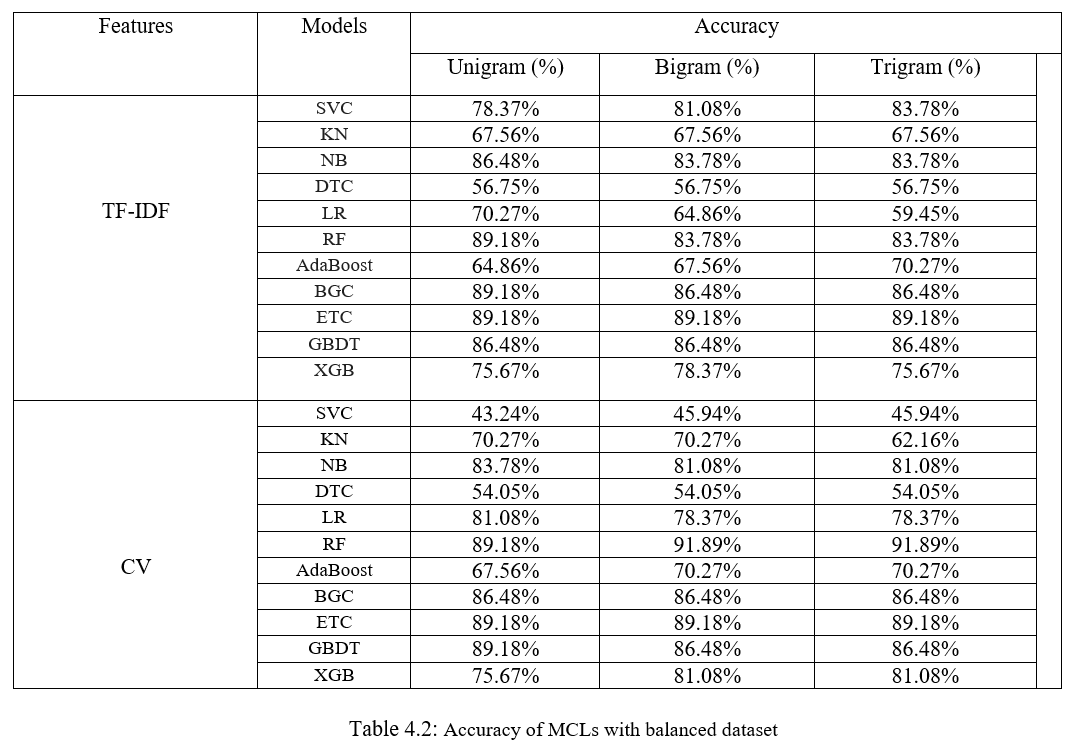

We observed that the Random Forest classifier performs well with Count Vectorizer, so we will train our data using Count Vectorizer. **If you want, you can also use CountVectorizer with bigrams for better accuracy.**

In [272]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()

x_train_rf = vectorizer.fit_transform(x_train)
x_test_rf = vectorizer.transform(x_test)

from sklearn.ensemble import RandomForestClassifier

model =RandomForestClassifier(n_estimators=50,random_state=2)
model.fit(x_train_rf,y_train)


RandomForestClassifier(n_estimators=50, random_state=2)

In [273]:
y_train_pred =model.predict(x_train_rf)
y_test_pred =model.predict(x_test_rf)


#Model Evaluation

To check overfitting or underfitting in RF model, you can use techniques such as model evaluation on training and testing accuracy

In [274]:
#Accuracy_score (train part)

score = accuracy_score(y_train,y_train_pred)
print('train part accuracy : ',score)

train part accuracy :  0.9932432432432432


In [275]:
#Accuracy_score (test part)

score = accuracy_score(y_test,y_test_pred)
print('test part accuracy : ',score)

test part accuracy :  0.8918918918918919


In [276]:
report = classification_report(y_test, y_test_pred, output_dict=False)
print(f"=========Classification Report for RandomForestClassifier======== \n\n{report}")

=========Classification Report for RandomForestClassifier======== 

              precision    recall  f1-score   support

           0       0.92      1.00      0.96        12
           1       0.80      0.92      0.86        13
           2       1.00      0.75      0.86        12

    accuracy                           0.89        37
   macro avg       0.91      0.89      0.89        37
weighted avg       0.90      0.89      0.89        37



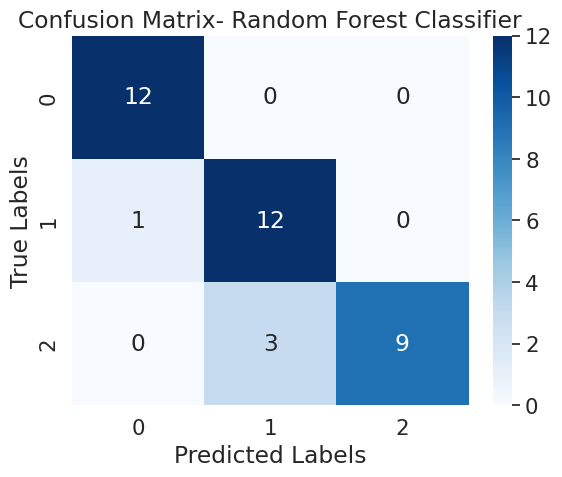

In [277]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_test_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix- Random Forest Classifier')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


#Building a prediction system for evaluating

In [278]:
from sklearn.feature_extraction.text import CountVectorizer

input_text = ["ব্যাংকের ঋণ প্রক্রিয়া অত্যন্ত জটিল এবং সময়সাপেক্ষ। আমি গত দুই মাস ধরে অপেক্ষা করছি।"]
input_encoded = vectorizer.transform(input_text)

# Predict using the model
prediction = model.predict(input_encoded)


if prediction == 1:
    print("Predicted class: Negative")
elif prediction == 0:
    print("Predicted class: Neutral")
else:
    print("Predicted class: Positive")




Predicted class: Negative


#Cross Validation

Cross validation for RF

In [171]:

from sklearn.model_selection import cross_val_score

model = RandomForestClassifier()

# Perform 10-fold cross-validation
scores = cross_val_score(model, x_train_rf, y_train, cv=10, scoring='accuracy')

# Output the accuracy for each fold
print(f'Accuracy for each fold -----------: {scores}')

Accuracy for each fold -----------: [0.8        0.86666667 0.8        0.86666667 0.73333333 0.93333333
 0.6        0.93333333 0.92857143 0.85714286]


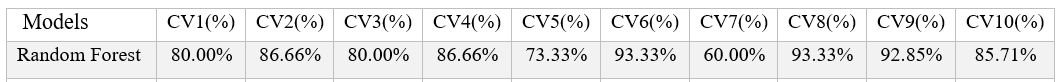

# Hyperparameter Optimization using Grid and Randomized Search

###Initialized Hyperparameters

In [217]:
#Define hyperparameters for Random Forest
rf_params = {
    'n_estimators': [101, 125, 151, 175, 201, 251, 300],
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 2,4,6,8,10,15,20,25,28],
    'min_samples_split': [2,3,4,5,6,7,8,10],
    'min_samples_leaf': [1, 2,3, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}


*Perform Randomized Search for Random Forest*

In [228]:
from sklearn.model_selection import RandomizedSearchCV
rf_randomized_search = RandomizedSearchCV(estimator=RandomForestClassifier(random_state=7),
                                      param_distributions=rf_params, n_iter=100, cv=9, random_state=7)
rf_randomized_search.fit(x_train_rf, y_train)

RandomizedSearchCV(cv=9, estimator=RandomForestClassifier(random_state=7),
                   n_iter=100,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [None, 2, 4, 6, 8, 10, 15,
                                                      20, 25, 28],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 3, 4],
                                        'min_samples_split': [2, 3, 4, 5, 6, 7,
                                                              8, 10],
                                        'n_estimators': [101, 125, 151, 175,
                                                         201, 251, 300]},
                   random_state=7)

In [229]:
rf_randomized_search.cv_results_

{'mean_fit_time': array([0.22610842, 0.00080122, 0.40008272, 0.31127066, 0.16554446,
        0.19721129, 0.18726932, 0.00078464, 0.00085717, 0.00116563,
        0.12533442, 0.28643899, 0.32825118, 0.317678  , 0.00076426,
        0.2518799 , 0.312102  , 0.00094324, 0.1270265 , 0.00075703,
        0.2979522 , 0.18019311, 0.12946656, 0.15590217, 0.21580564,
        0.2324086 , 0.28823047, 0.3226854 , 0.00085078, 0.22246191,
        0.25646419, 0.00078403, 0.25713372, 0.13170444, 0.35350121,
        0.29903685, 0.00157573, 0.00139697, 0.45597068, 0.37531077,
        0.00080162, 0.26201198, 0.21079803, 0.20552283, 0.00141271,
        0.26712595, 0.24178807, 0.34217893, 0.16102677, 0.49750018,
        0.37402307, 0.00074093, 0.15687063, 0.00082472, 0.00072585,
        0.26247528, 0.20517543, 0.00078901, 0.00072924, 0.00072008,
        0.00073928, 0.00073332, 0.29046618, 0.16321132, 0.22513451,
        0.13386928, 0.2221214 , 0.18829539, 0.18741663, 0.44873444,
        0.38921658, 0.16217232,

In [230]:
tuning_result_rf_rs = pd.DataFrame(rf_randomized_search.cv_results_)
tuning_result_rf_rs

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,param_min_samples_split,param_min_samples_leaf,param_max_features,param_max_depth,param_criterion,...,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,mean_test_score,std_test_score,rank_test_score
0,0.226108,0.006575,0.010841,0.001287,175,6,3,sqrt,25,entropy,...,0.882353,0.588235,0.75,0.5000,0.4375,0.8125,0.8125,0.688317,0.141932,40
1,0.000801,0.000108,0.000000,0.000000,201,2,1,auto,8,entropy,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,68
2,0.400083,0.091337,0.018998,0.004619,251,6,2,log2,None,gini,...,0.882353,0.705882,0.75,0.5625,0.6875,0.8125,0.8750,0.756127,0.097224,12
3,0.311271,0.074475,0.015741,0.003980,201,8,4,log2,10,entropy,...,0.882353,0.588235,0.75,0.6250,0.3125,0.6875,0.7500,0.641340,0.151883,58
4,0.165544,0.006308,0.008578,0.001225,125,8,2,sqrt,25,gini,...,0.941176,0.764706,0.75,0.5625,0.5625,0.8125,0.8125,0.741830,0.113750,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.000809,0.000141,0.000000,0.000000,201,2,4,auto,2,gini,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,68
96,0.419201,0.092387,0.023658,0.004437,251,4,3,log2,25,gini,...,0.882353,0.647059,0.75,0.6250,0.5625,0.7500,0.7500,0.708742,0.086582,29
97,0.001179,0.000130,0.000000,0.000000,101,4,1,auto,20,gini,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,68
98,0.001169,0.000048,0.000000,0.000000,300,2,4,auto,28,entropy,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,68


In [231]:
rf_randomized_search.best_params_

{'n_estimators': 151,
 'min_samples_split': 3,
 'min_samples_leaf': 1,
 'max_features': 'log2',
 'max_depth': 15,
 'criterion': 'gini'}

Evaluate the optimized RF models for Randomized Search

In [232]:
y_pred_rf_rs = rf_randomized_search.predict(x_test_rf)
print("\n Random Forest Randomized Search Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred_rf_rs))
print("Classification Report:")
print(classification_report(y_test, y_pred_rf_rs))


 Random Forest Randomized Search Performance:
Accuracy: 0.8648648648648649
Classification Report:
              precision    recall  f1-score   support

           0       0.75      1.00      0.86        12
           1       0.92      0.85      0.88        13
           2       1.00      0.75      0.86        12

    accuracy                           0.86        37
   macro avg       0.89      0.87      0.86        37
weighted avg       0.89      0.86      0.87        37



Final Performance Comparison of before RF & after RF with Randomized Search Optimization

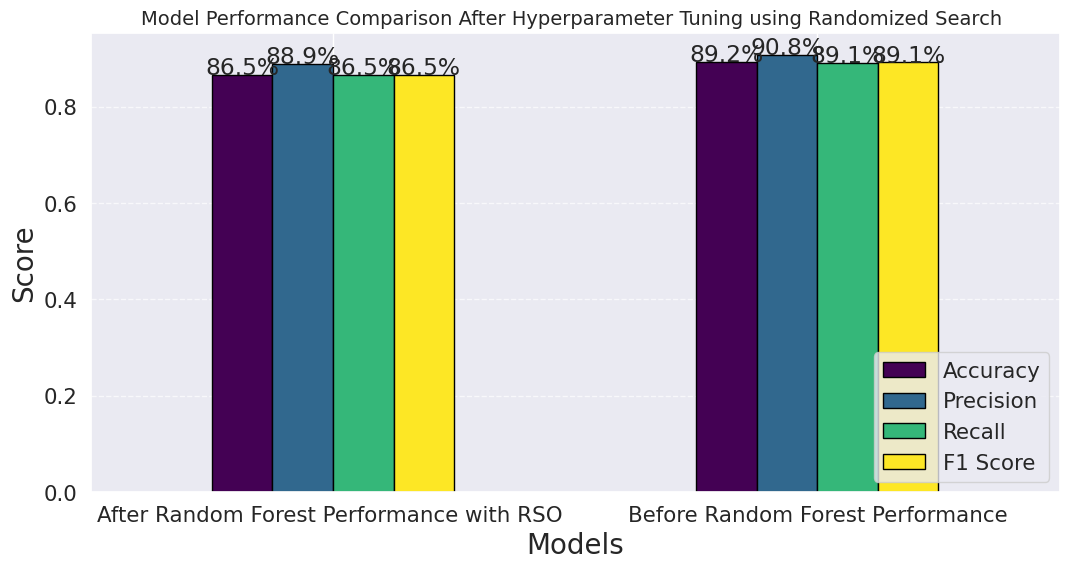

In [233]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Store model names
models = ["After Random Forest Performance with RSO ", "Before Random Forest Performance"]

# Compute metrics
metrics = {
    "Accuracy": [
        accuracy_score(y_test, y_pred_rf_rs),
        accuracy_score(y_test, y_test_pred)
    ],
    "Precision": [
        precision_score(y_test, y_pred_rf_rs, average='macro'),
        precision_score(y_test, y_test_pred, average='macro')
    ],
    "Recall": [
        recall_score(y_test, y_pred_rf_rs, average='macro'),
        recall_score(y_test, y_test_pred, average='macro')
    ],
    "F1 Score": [
        f1_score(y_test, y_pred_rf_rs, average='macro'),
        f1_score(y_test, y_test_pred, average='macro')
    ]
}

# Convert dictionary to DataFrame
df_metrics = pd.DataFrame(metrics, index=models)

# Plot bar chart with explicit figure size adjustment
fig, ax = plt.subplots(figsize=(11, 6))  # Create a larger figure with width=14, height=10
df_metrics.plot(kind="bar", colormap="viridis", edgecolor="black", ax=ax)

# Title and labels
plt.title("Model Performance Comparison After Hyperparameter Tuning using Randomized Search ", fontsize=14)
plt.xlabel("Models", fontsize=20)
plt.ylabel("Score", fontsize=20)

# Set grid, legend, and x-tick rotation
plt.xticks(rotation=0)
plt.legend(loc="lower right")
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Show percentage values on the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height()*100:.1f}%', (p.get_x() + p.get_width() / 2., p.get_height()),
                xytext=(0, 5), textcoords='offset points', ha='center', va='center')

# Adjust layout to ensure everything fits nicely
plt.tight_layout()

# Show the plot
plt.show()

================================================================================

.

.

.

.

.

.

================================================================================

#Tokenization

In [236]:
from keras.preprocessing.sequence import pad_sequences

max_words = 100
max_sequence_length = 100

tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(x_train)

x_train_tk = tokenizer.texts_to_sequences(x_train)
x_test_tk = tokenizer.texts_to_sequences(x_test)

x_train_tk_seq = pad_sequences(x_train_tk, maxlen=max_sequence_length)
x_test_tk_seq = pad_sequences(x_test_tk, maxlen=max_sequence_length)

In [241]:
x_train_tk[:5]

[[1, 84, 85],
 [1, 37, 19, 86, 38, 57],
 [2, 20, 6, 28],
 [1, 29, 30, 39],
 [1, 37, 28, 12, 58, 4]]

In [237]:
x_train_tk_seq[:5]

array([[ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  1, 84, 85],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1, 37,
        19, 86, 38, 57],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0

Covert into Numpy Array

In [239]:
x_train_tk_seq_ary = np.array(x_train_tk_seq)
x_test_tk_seq_ary = np.array(x_test_tk_seq)
y_train_ary = np.array(y_train)
y_test_ary = np.array(y_test)

#Training RNN

In [254]:
from keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, LayerNormalization,  Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping


model = Sequential([
    Embedding(input_dim = max_words, output_dim = 300, input_length=max_sequence_length),
    SimpleRNN(128, return_sequences=True, dropout=0.3),
    LayerNormalization(),
    SimpleRNN(128, dropout=0.3), #2nd RNN
    LayerNormalization(),

    #Output
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(3, activation='softmax')
])

 # Compile model
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


# Early Stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train model
history = model.fit(x_train_tk_seq_ary, y_train_ary, epochs=15, batch_size=12, validation_data=(x_test_tk_seq_ary, y_test_ary), callbacks=[early_stopping], verbose=1)



Epoch 1/15
13/13 ━━━━━━━━━━━━━━━━━━━━ 13s 339ms/step - accuracy: 0.3544 - loss: 1.3817 - val_accuracy: 0.3243 - val_loss: 1.1650
Epoch 2/15
13/13 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - accuracy: 0.3094 - loss: 1.2270 - val_accuracy: 0.3784 - val_loss: 1.0620
Epoch 3/15
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.3847 - loss: 1.0944 - val_accuracy: 0.5135 - val_loss: 1.0116
Epoch 4/15
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.5783 - loss: 0.9474 - val_accuracy: 0.5405 - val_loss: 1.0047
Epoch 5/15
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.5287 - loss: 0.8658 - val_accuracy: 0.4865 - val_loss: 0.9178
Epoch 6/15
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - accuracy: 0.7207 - loss: 0.6540 - val_accuracy: 0.7838 - val_loss: 0.5976
Epoch 7/15
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.7071 - loss: 0.7107 - val_accuracy: 0.7838 - val_loss: 0.5136
Epoch 8/15
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.7813 - loss: 0.4626 - val_accuracy: 0.6757 -

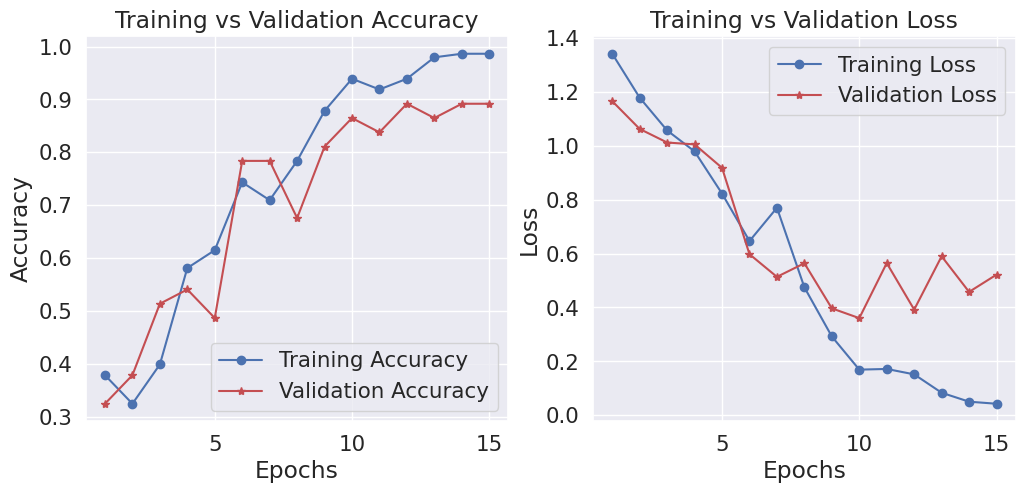

In [255]:
# Extract values from history
epochs = range(1, len(history.history['accuracy']) + 1)
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
train_loss = history.history['loss']
val_loss = history.history['val_loss']

# Plot Accuracy
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(epochs, train_acc, 'bo-', label='Training Accuracy')
plt.plot(epochs, val_acc, 'r*-', label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training vs Validation Accuracy')
plt.legend()

# Plot Loss
plt.subplot(1, 2, 2)
plt.plot(epochs, train_loss, 'bo-', label='Training Loss')
plt.plot(epochs, val_loss, 'r*-', label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training vs Validation Loss')
plt.legend()

plt.show()

In [259]:
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np

# Evaluate with a confusion matrix and classification report
y_pred = model.predict(x_test_tk_seq_ary)
y_pred = np.argmax(y_pred, axis=1)
cm = confusion_matrix(y_test_ary, y_pred)
print("Confusion Matrix:")
print(cm)

report = classification_report(y_test_ary, y_pred)
print("=================Classification Report For RNN=================")
print(report)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
Confusion Matrix:
[[11  0  1]
 [ 1 10  2]
 [ 0  1 11]]
=================Classification Report=================
              precision    recall  f1-score   support

           0       0.92      0.92      0.92        12
           1       0.91      0.77      0.83        13
           2       0.79      0.92      0.85        12

    accuracy                           0.86        37
   macro avg       0.87      0.87      0.87        37
weighted avg       0.87      0.86      0.86        37



#Training LSTM

*Bidirectional LSTM*

In [263]:
from tensorflow.keras.layers import Bidirectional, LSTM, Dropout, LayerNormalization


model = Sequential([
    Embedding(input_dim = max_words, output_dim = 300, input_length=max_sequence_length),
    Bidirectional(LSTM(128, return_sequences=True, recurrent_dropout=0.2)),
    LayerNormalization(),
    Dropout(0.3),

    Bidirectional(LSTM(128, recurrent_dropout=0.2)), #2nd BiLSTM
    LayerNormalization(),
    Dropout(0.3),

    #Output
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(3, activation='softmax')
])

 # Compile model
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


# Early Stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train model
history = model.fit(x_train_tk_seq_ary, y_train_ary, epochs=15, batch_size=12, validation_data=(x_test_tk_seq_ary, y_test_ary), callbacks=[early_stopping], verbose=1)



Epoch 1/15
13/13 ━━━━━━━━━━━━━━━━━━━━ 28s 1s/step - accuracy: 0.3787 - loss: 1.7450 - val_accuracy: 0.3243 - val_loss: 1.1184
Epoch 2/15
13/13 ━━━━━━━━━━━━━━━━━━━━ 15s 1s/step - accuracy: 0.5172 - loss: 1.0443 - val_accuracy: 0.6757 - val_loss: 0.8224
Epoch 3/15
13/13 ━━━━━━━━━━━━━━━━━━━━ 31s 2s/step - accuracy: 0.5646 - loss: 0.8393 - val_accuracy: 0.5946 - val_loss: 0.7502
Epoch 4/15
13/13 ━━━━━━━━━━━━━━━━━━━━ 28s 1s/step - accuracy: 0.7175 - loss: 0.5979 - val_accuracy: 0.6486 - val_loss: 0.5942
Epoch 5/15
13/13 ━━━━━━━━━━━━━━━━━━━━ 20s 1s/step - accuracy: 0.8710 - loss: 0.3315 - val_accuracy: 0.6757 - val_loss: 0.5223
Epoch 6/15
13/13 ━━━━━━━━━━━━━━━━━━━━ 25s 2s/step - accuracy: 0.8903 - loss: 0.3051 - val_accuracy: 0.7838 - val_loss: 0.5598
Epoch 7/15
13/13 ━━━━━━━━━━━━━━━━━━━━ 34s 1s/step - accuracy: 0.9147 - loss: 0.1916 - val_accuracy: 0.7838 - val_loss: 0.4280
Epoch 8/15
13/13 ━━━━━━━━━━━━━━━━━━━━ 22s 1s/step - accuracy: 0.9592 - loss: 0.0978 - val_accuracy: 0.7838 - val_loss:

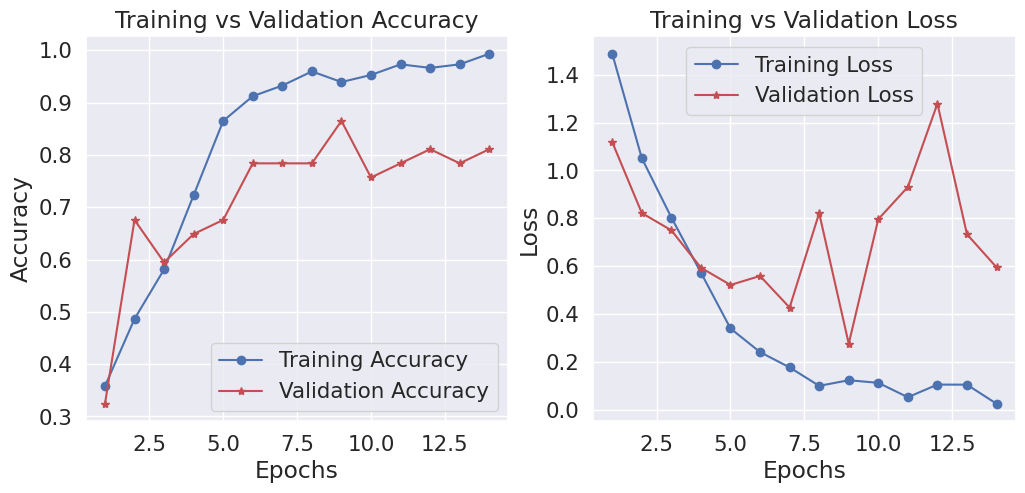

In [265]:
# Extract values from history
epochs = range(1, len(history.history['accuracy']) + 1)
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
train_loss = history.history['loss']
val_loss = history.history['val_loss']

# Plot Accuracy
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(epochs, train_acc, 'bo-', label='Training Accuracy')
plt.plot(epochs, val_acc, 'r*-', label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training vs Validation Accuracy')
plt.legend()

# Plot Loss
plt.subplot(1, 2, 2)
plt.plot(epochs, train_loss, 'bo-', label='Training Loss')
plt.plot(epochs, val_loss, 'r*-', label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training vs Validation Loss')
plt.legend()

plt.show()

In [266]:
# Evaluate with a confusion matrix and classification report
y_pred = model.predict(x_test_tk_seq_ary)
y_pred = np.argmax(y_pred, axis=1)
cm = confusion_matrix(y_test_ary, y_pred)
print("Confusion Matrix:")
print(cm)

report = classification_report(y_test_ary, y_pred)
print("=================Classification Report For LSTM=================")
print(report)

2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 1s/step
Confusion Matrix:
[[12  0  0]
 [ 0 10  3]
 [ 0  2 10]]
=================Classification Report For LSTM=================
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       0.83      0.77      0.80        13
           2       0.77      0.83      0.80        12

    accuracy                           0.86        37
   macro avg       0.87      0.87      0.87        37
weighted avg       0.87      0.86      0.86        37



#Training GRU

In [267]:
from tensorflow.keras.layers import Embedding, GRU, LayerNormalization, Dropout, Dense

model = Sequential([
    Embedding(input_dim = max_words, output_dim = 300, input_length=max_sequence_length),
    GRU(128, return_sequences=True, dropout=0.3, recurrent_dropout=0.2),
    LayerNormalization(),

    GRU(128, dropout=0.3, recurrent_dropout=0.2), #2nd GRU
    LayerNormalization(),
    Dropout(0.3),

    #Output
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(3, activation='softmax')
])

 # Compile model
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


# Early Stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train model
history = model.fit(x_train_tk_seq_ary, y_train_ary, epochs=15, batch_size=12, validation_data=(x_test_tk_seq_ary, y_test_ary), callbacks=[early_stopping], verbose=1)



Epoch 1/15
13/13 ━━━━━━━━━━━━━━━━━━━━ 16s 645ms/step - accuracy: 0.3849 - loss: 1.3712 - val_accuracy: 0.6216 - val_loss: 0.7725
Epoch 2/15
13/13 ━━━━━━━━━━━━━━━━━━━━ 9s 571ms/step - accuracy: 0.6431 - loss: 0.7879 - val_accuracy: 0.7297 - val_loss: 0.6370
Epoch 3/15
13/13 ━━━━━━━━━━━━━━━━━━━━ 11s 627ms/step - accuracy: 0.7553 - loss: 0.5478 - val_accuracy: 0.6216 - val_loss: 0.7837
Epoch 4/15
13/13 ━━━━━━━━━━━━━━━━━━━━ 11s 708ms/step - accuracy: 0.8697 - loss: 0.2777 - val_accuracy: 0.7297 - val_loss: 0.5584
Epoch 5/15
13/13 ━━━━━━━━━━━━━━━━━━━━ 10s 698ms/step - accuracy: 0.8470 - loss: 0.3138 - val_accuracy: 0.7027 - val_loss: 0.5244
Epoch 6/15
13/13 ━━━━━━━━━━━━━━━━━━━━ 9s 565ms/step - accuracy: 0.8947 - loss: 0.2498 - val_accuracy: 0.7297 - val_loss: 0.8290
Epoch 7/15
13/13 ━━━━━━━━━━━━━━━━━━━━ 10s 568ms/step - accuracy: 0.8868 - loss: 0.2784 - val_accuracy: 0.8108 - val_loss: 0.5620
Epoch 8/15
13/13 ━━━━━━━━━━━━━━━━━━━━ 13s 730ms/step - accuracy: 0.9347 - loss: 0.1873 - val_accura

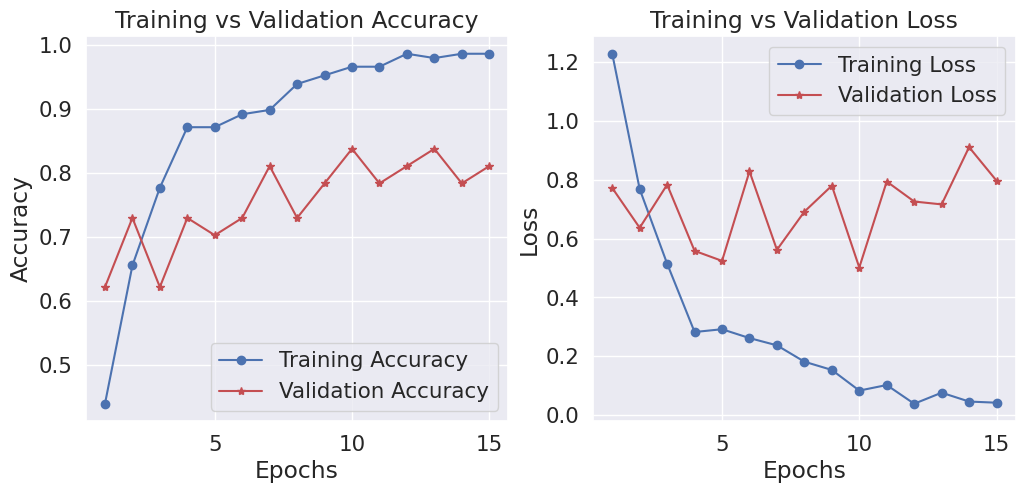

In [268]:
# Extract values from history
epochs = range(1, len(history.history['accuracy']) + 1)
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
train_loss = history.history['loss']
val_loss = history.history['val_loss']

# Plot Accuracy
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(epochs, train_acc, 'bo-', label='Training Accuracy')
plt.plot(epochs, val_acc, 'r*-', label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training vs Validation Accuracy')
plt.legend()

# Plot Loss
plt.subplot(1, 2, 2)
plt.plot(epochs, train_loss, 'bo-', label='Training Loss')
plt.plot(epochs, val_loss, 'r*-', label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training vs Validation Loss')
plt.legend()

plt.show()

In [270]:
# Evaluate with a confusion matrix and classification report
y_pred = model.predict(x_test_tk_seq_ary)
y_pred = np.argmax(y_pred, axis=1)
cm = confusion_matrix(y_test_ary, y_pred)
print("Confusion Matrix:")
print(cm)

report = classification_report(y_test_ary, y_pred)
print("=================Classification Report For GRU=================")
print(report)

1/2 ━━━━━━━━━━━━━━━━━━━━ 1s 2s/step

2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 1s/step
Confusion Matrix:
[[12  0  0]
 [ 0  9  4]
 [ 0  2 10]]
=================Classification Report For GRU=================
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       0.82      0.69      0.75        13
           2       0.71      0.83      0.77        12

    accuracy                           0.84        37
   macro avg       0.84      0.84      0.84        37
weighted avg       0.84      0.84      0.84        37

